In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import folium 
from folium import plugins 
import statistics 
from scipy import stats 

In [49]:
# Cargar los datos
file_path = 'C:/Users/rodri/OneDrive/Escritorio/boston_house_prices.csv'
data = pd.read_csv(file_path)

# Revisar las primeras filas del dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Nomenclatura de los datos de la tabla “boston_house_price”. 

CRIM: Índice de criminalidad per cápita 

ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 s.f. (equivalente a 2.223 metros cuadrados). 

INDUS: Proporción de superficie de negocio no minorista. 

CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso) 

NOX: Concentración de óxidos de nitrógeno (partes por 10 millones) 

RM: Número promedio de habitaciones por vivienda 

AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940 

DIS: Distancias ponderadas a cinco centros de empleo de Boston 

RAD: Índice de accesibilidad a las autopistas radiales 

TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad 

PTRATIO: Ratio de alumnos por profesor 

B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana 

LSTAT: Porcentaje de población de “estatus de bajo nivel” 

MEDV: Valor medio de viviendas en propiedad (en miles de dólares) 

In [3]:
# Descripción estadística del dataset
description = data.describe()
description

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Nomenclatura de la tabla. 

count: Cantidad de datos por cada variable. 

mean: La media.

std: Desviación estándar. Es la variación o dispersión en la que los puntos de datos individuales difieren de la media de la variable en estudio. 

min: Valor mínimo de la variable. 

25%: Percentil. Indicador que señala que una vez ordenados los datos de menor a mayor, este se encuentra en la posición del 25% de los datos desde el dato menor al mayor.

50%: Percentil. Indicador que señala que una vez ordenados los datos de menor a mayor, este se encuentra en la posición del 50% de los datos desde el dato menor al mayor.

75%: Percentil. Indicador que señala que una vez ordenados los datos de menor a mayor, este se encuentra en la posición del 75% de los datos desde el dato menor al mayor.

max: Valor máximo de la variable. 


Análisis descriptivo de las variables. 

CRIM: En cuanto al índice de criminalidad per cápita de Boston, este tiene una media de 3,61 crímenes per cápita; con una desviación estándar de 8,60 lo cual indica que existe una gran variabilidad en los 
índices de criminalidad per cápita de Boston. Sería interesante estudiar el comportamiento de esta variable por barrios de Boston, y así determinar en qué áreas de Boston hay más crímenes y en cuales hay menos. 

ZN: Esta variable que representa la proporción de superficie residencial establecida en lotes mayores de 25.000 s.f. o pies cuadrados equivalentes a 2322,576 metros cuadrados o 0,23 hectareas. Tiene una media 
de 11,36, y su rango de valores va desde 0 a 100, la mayoría de los datos tiene un valor entre 0 y 30. Sería interesante averiguar en que sectores de Boston se encuentran las superficies residenciales con lotes 
mayores de 25.000 s.f. 

INDUS: La proporción de superficie de negocio no minorista tiene una media de 11,14, con un valor máximo de 27, 74. Sería interesante averiguar en que sectores de Boston se encuentran las superficies de negocio 
no minorista más grandes. 

CHAS: Esta variable muestra que una fracción muy pequeña de las viviendas están en la ribera del río Charles, siendo de un 7% del total de las viviendas. 

NOX: La concentración de oxido de Nitrógeno en la atmosfera, medida en partes por cada 10 millones de partículas, tiene una media de 0,55, con una dispersión moderada. Siendo su valor mínimo de 0,39 y 
su valor máximo de 0,87. 

RM: La cantidad media de habitaciones por vivienda es de 6,28, con una desviación estándar de 0,70. Además, su rango de valores está entre 3,56 y 8,78. Sería interesante averiguar como se distribuyen en
Boston las viviendas según la cantidad de habitaciones que estas tengan. 

AGE: La proporción de viviendas en propiedad ocupadas y que además fueron construidas antes de 1940, tiene una media de 68,57%. 

DIS: La distancia promedio ponderada a los cinco centros de empleo de Boston es de 3,80, y la desviación estándar es de 2,11. Sería interesante posicionar esos cinco centros de empleo en el mapa de Boston 
y determinar su proximidad a las viviendas de Boston. 

RAD: El índice de accesibilidad a las autopistas radiales varía de 1 a 24, con un valor medio de 9,55. Sería interesante averiguar cuales son las viviendas que tienen un acceso más cercano a las autopistas 
radiales. 

TAX: El valor de la media del pago de impuestos de bienes inmuebles es de 408,24, y su rango de valores varia desde 187 hasta 711. Seria interesante averiguar que barrios de Boston pagan más impuestos de
bienes, y en que barrios se pagan menos impuestos de bienes inmuebles. 

PTRATIO: El ratio de alumnos por profesor tiene una media de 18,46, el que varía entre 12,60 y 22,00. Sería interesante averiguar en que barrios de Boston la educación es más personalizada.  

B: Este índice tiene un valor esperado promedio de población descendiente afroamericana en Boston es de 0,63. Señala la magnitud de la desviación de la proporción de Afroamericanos en un barrio de Boston 
respecto al valor 0,63. La media de esta variable es de 356,68 y su desviación estándar es de 91,29; lo que indica una gran dispersión de los datos. 

LSTAT: El porcentaje de la población de estatus de bajo nivel tiene una media de 12,65%, y su rango varía desde 1,73% hasta 37,97%. Sería interesante averiguar que barrios de Boston presentan una mayor pobreza. 

MEDV: El valor medio de las viviendas en propiedad es de 22,53 (en miles de dólares). Su rango de valores fluctúa entre los 5,00 y los 50,00. Sería interesante averiguar cual es el valor medio de 
las viviendas en cada barrio de Boston. 

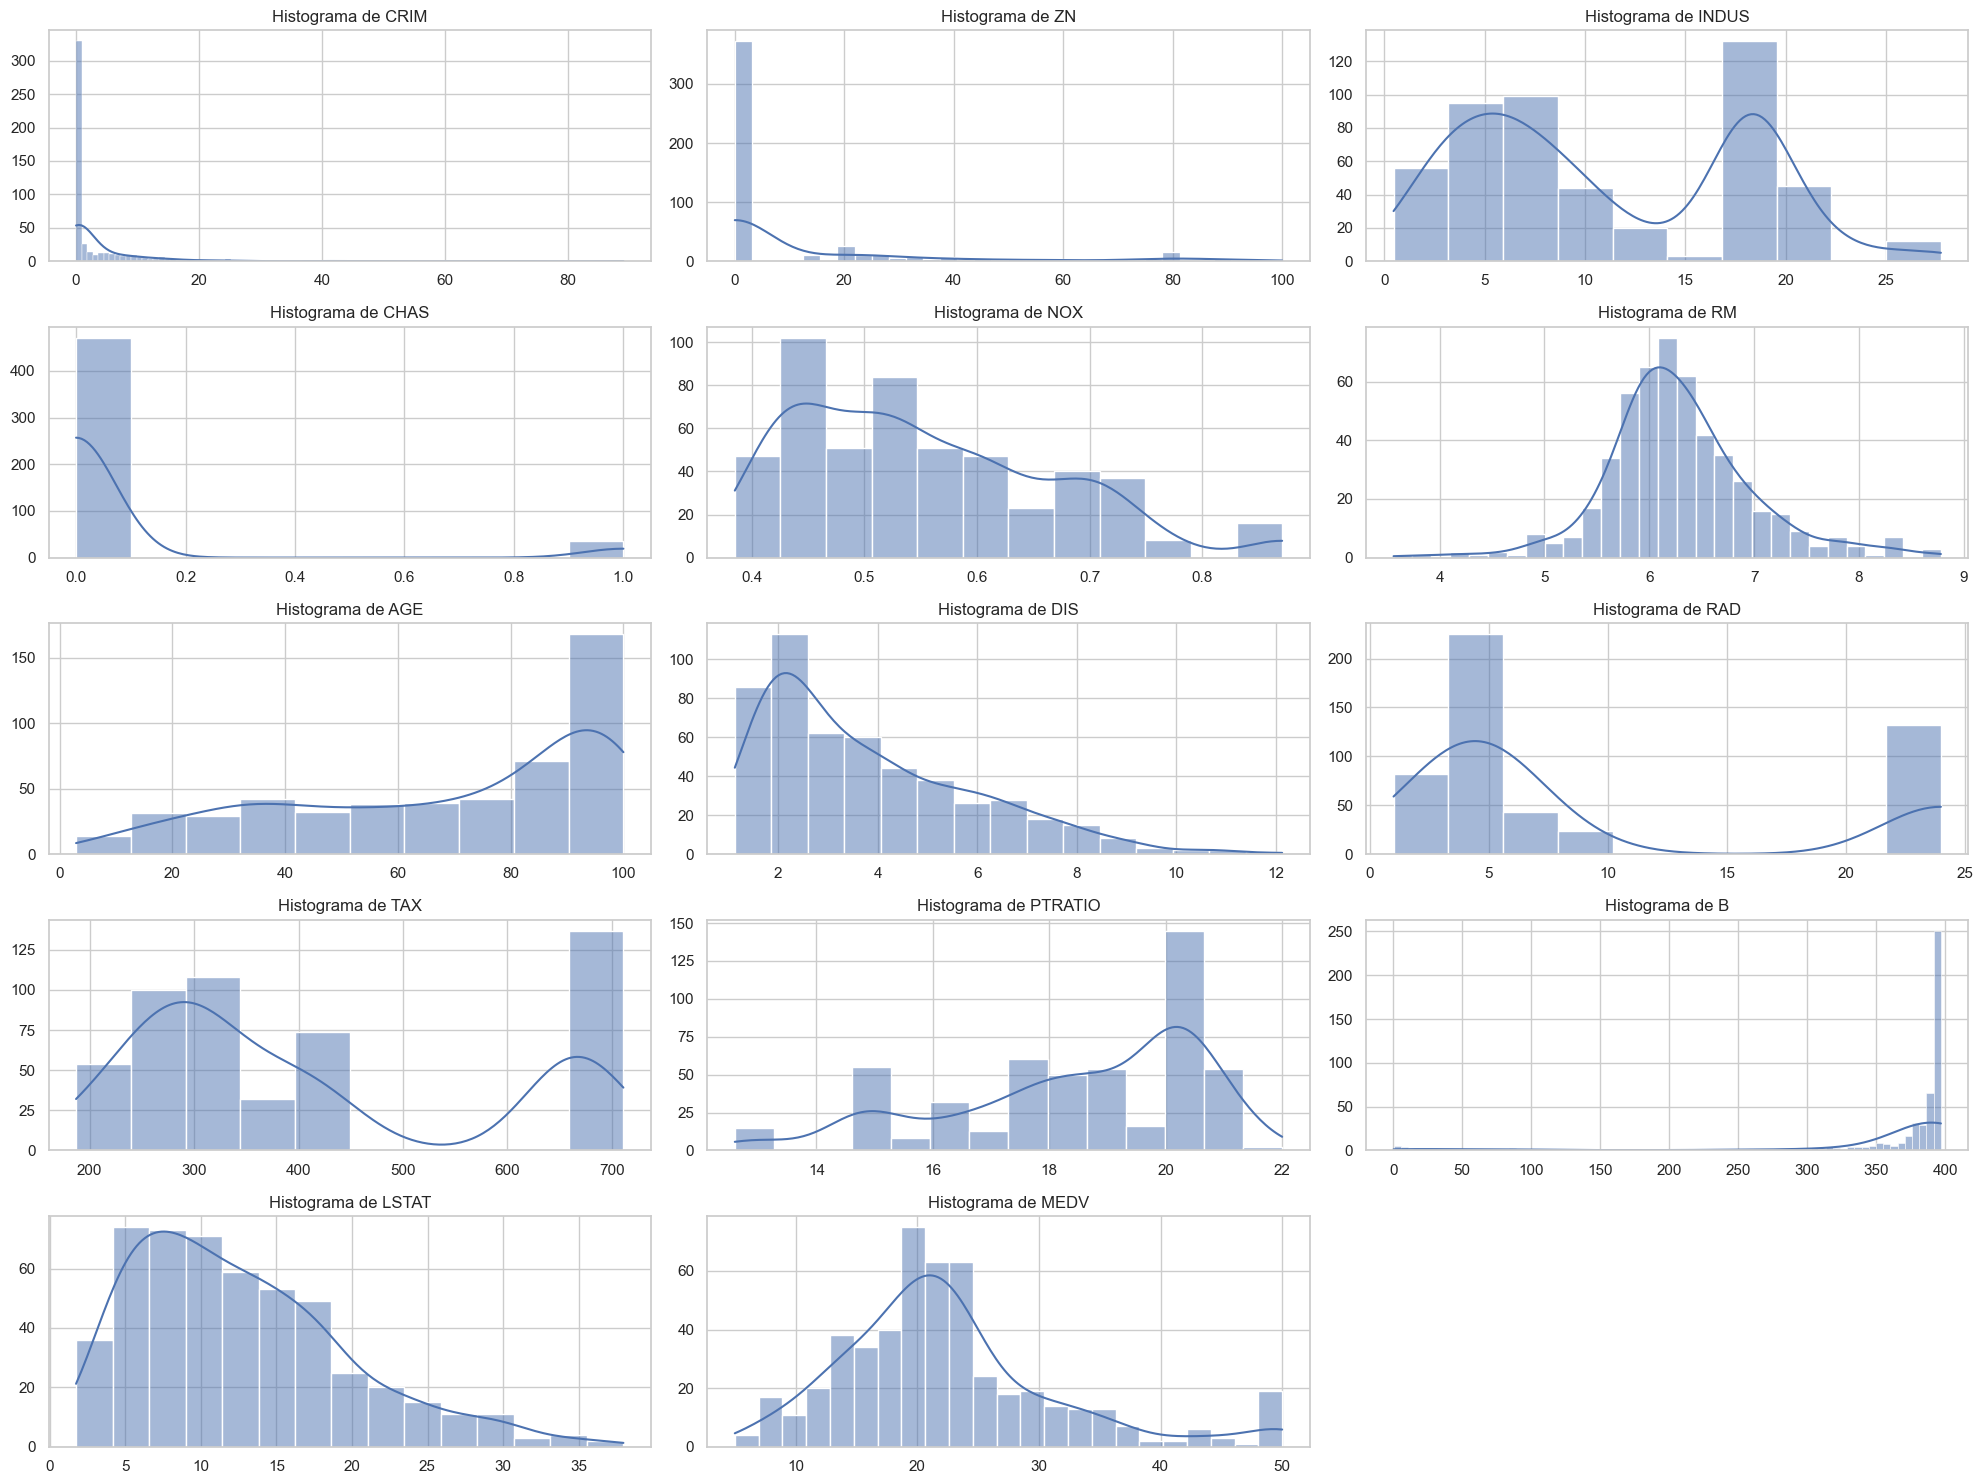

In [6]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Lista de variables
variables = data.columns

# Crear subplots
for i, var in enumerate(variables):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show() 

ANALISIS: 

1.- CRIM (Índice de criminalidad per cápita): Es una distribución altamente sesgada a la derecha, y la mayoría de sus valores son bajos. Con lo cúal se puede inferir que Boston tiene una baja tasa de criminalidad per cápita. 

2.- ZN (Proporción de superficie residencial en lotes grandes): La mayor parte de los valores de esta variable están en cero, y con una pequeña cantidad distribuidos hasta el cien. A partir de esto se puede decir que la gran mayoría de las superficies residenciales en Boston son pequeñas. 

3.- INDUS (Proporción de superficie de negocio no minorista): Esta variable presenta una distribución con dos picos cuyos valores son 7 y 18 aproximádamente. 

4.- CHAS (Río Charles): La distribución de esta variable presenta dos valores, los cuales son cero y 10 aproximadamente. La mayoria de los valores de esta variable son cero. 

5.- NOX (Concentración de oxido de Nitrógeno): La distribución de esta variable está sesgada hacia la derecha, y su mayor concentración se encuentra en el rango de valores que va desde 0,5 y 0,6. 

6.- RM (Número promedio de habitaciones por vivienda): Esta variable presenta una distribución que se aproxima a la Normal. Además, sus valores presentan un pico en 6 aproximadamente. 

7.- AGE (Proporción de viviendas construidas antes de 1940): Esta variable presenta una distribución sesgada a la derecha, y un pico en el valor 100. Lo cual indica que la mayoría de las casas fueron construidas hace cien años. 

8.- DIS (Distancias a centros de empleo): Esta variable presenta una distribución sesgada a la izquierda. Además, presenta un pico en el valor 1,5. Esto indica que las viviendas tienen algún centro de empleo relatívamente cerca. 

9.- RAD (Índice de accesibilidad a autopistas radiales): La distribución de esta variable presenta dos picos, uno en el valor 4 y otro en el valor 24. Además, la mayoría de sus valores se encuentran entre dos y 10. A partir de esto se puede inferir que la mayoría de las viviendas de Boston tienen alguna autopista radial cerca. 

10.- TAX (Parte del impuesto de bienes inmuebles): Esta variable presenta una distribución sesgada a la derecha, y sus valores presentan un pico en 650. 

11.- PTRATIO (Ratio de alumnos por profesor): Su distribución está sesgada hacia la izquierda, y sus valores tienen un pico en alrededor de 20. 

12.- B (Proporción de personas de ascendencia afroamericana): Esta variable presenta una distribución sesgada a la izquierda. Además, tienen un pico en el valor 400. 

13.- LSTAT (Porcentaje de población de "estatus de bajo nivel"): Esta variable presenta una distribución sesgada a la izquierda, con un pico en el valor diez. 

14.- MEDV (Valor medio de las viviendas): Esta variable presenta una distribución con muy poco sesgo, y sus valores tienen un pico en 20. 

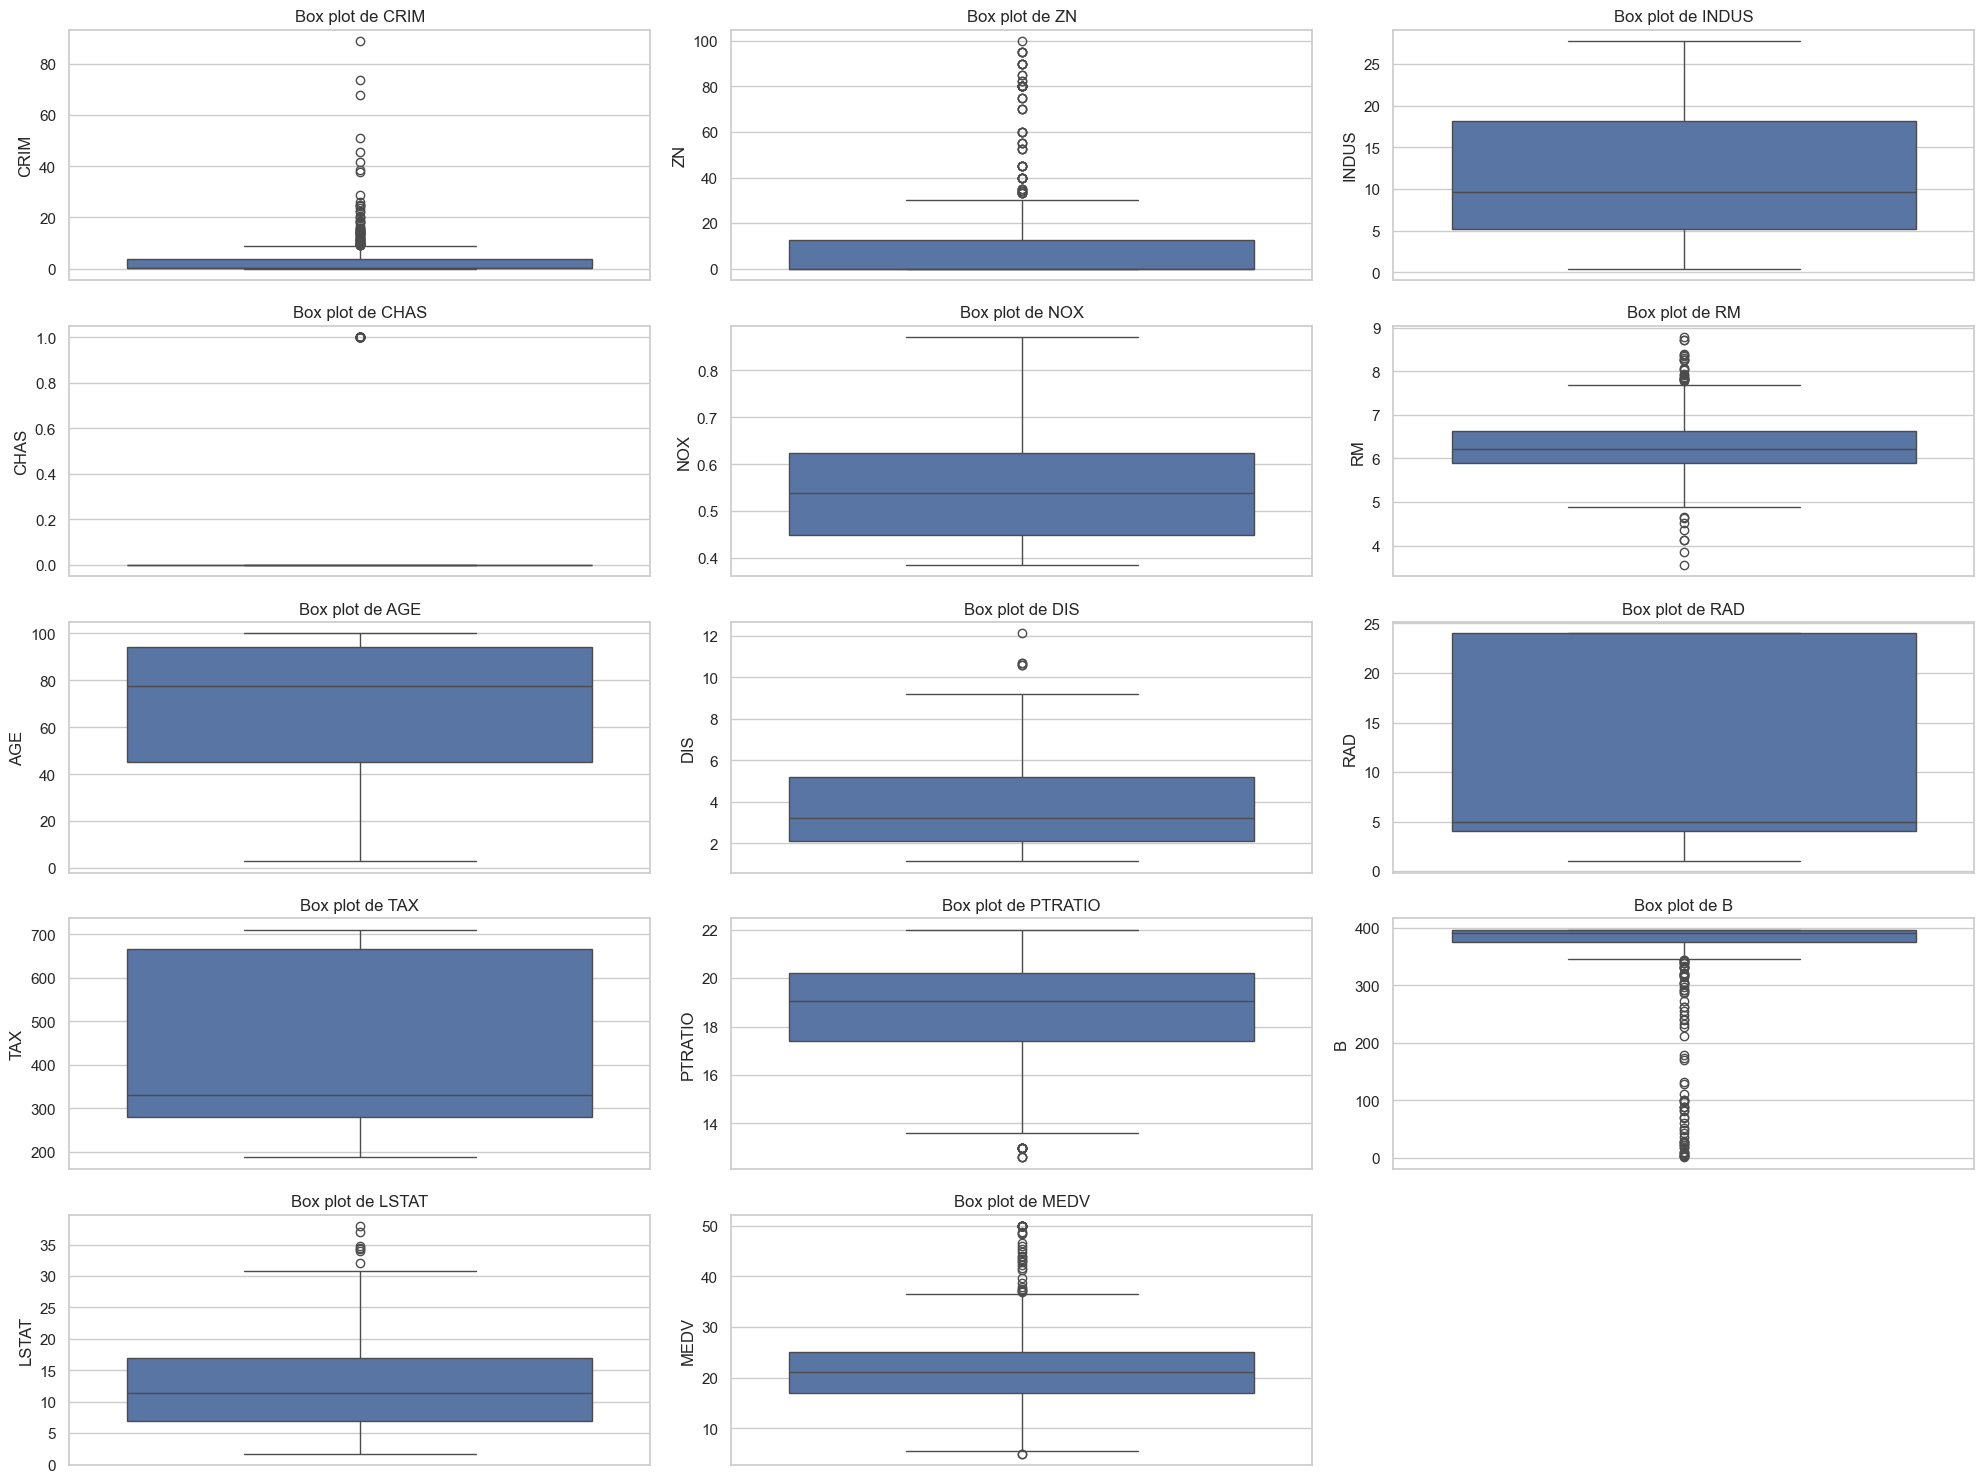

In [7]:
plt.figure(figsize=(20, 15))

# Crear subplots
for i, var in enumerate(variables):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data[var])
    plt.title(f'Box plot de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

ANALISIS: 

Los gráficos de caja muestran la distribución de cada variable, poniendo especial enfasis en la mediana, los cuartiles y los valores atípicos. 

1.- CRIM (Índice de criminalidad per cápita): Es una variable que tiene valores muy bajos, cercanos a cero, a excepción de unos valores atípicos, los cuales son bastante más altos. Estos datos indican que esta variable tiene una distribución sesgada a la derecha, lo cual se puede comprobar en el histograma de esta variable que se realizó en el apartado anterior. 

2.- ZN (Proporción de superficie residencial en lotes grandes): Esta variable presenta valores cercanos a cero, con ecepción de algunos valores atípicos, los cuales se aproximan a 100. La mediana de esta variable es cercana a cero, con lo cual, se obtiene de la información que muchos de los barrios de Boston no tienen lotes residenciales. 

3.- INDUS (Proporción de superficie de negocio no minorista): Esta variable presenta una mediana que se sitúa en alrededor de 10. Además, su rango intercuartil está entre 5 y 17. 

4.- CHAS (Río Charles): La mayoría de los valores de esta variable están en cero, con muy pocos valores en uno. Esto indica que muy pocas áreas edificadas están en la ribera del río Charles. 

5.- NOX (Concentración de óxidos de Nitrógeno): La mediana de esta variable está en alrededor de 0,55; y su rango intercuartil está entre 0,45 y 0,65. Algunos valores atípicos llegan hasta el 0,80. 

6.- RM (Número promedio de habitaciones por vivienda): La mediana es de aproximadamente 6 habitaciones, con un rango intercuartil que va desde 5,5 hasta 6,5. Además, tiene muchos valores atípicos por encima de 7. 

7.- AGE (Proporción de viviendas construidas antes de 1940): La mediana de esta variable tiene un valor que se ubica en 77 aproximádamente; y su rango intercuartil está entre 45 y 95. Esto indica que la mayoria de las viviendas de Boston son antiguas. 

8.- DIS (Distancias a centros de empleo): La mediana tiene un valor de 3,8, y su rango intercuartil va desde 2 hasta 6. Esto quiere decir que la mitad de las viviendas tienen una distancia a algún centro de empleo que va desde 2 hasta 3,8; y la otra mitad de las viviendas tienen un valor en esta variable que abarca desde 3,8 hasta 6. 

9.- RAD (Índice de accesibilidad a autopistas radiales): La mediana de esta variable es de 5, y su rango intercuartil es de 4 hasta 9. Algunos valores atípicos llegan hasta el número 24. 

10: TAX (Parte del impuesto de bienes inmuebles): La mediana de esta variable es de aproximadamente 300, con un rango intercuartil desde 250 hasta 700. Esto quiere decir que la mitad de las viviendas tienen un impuesto de bienes inmuebles que va desde 250 hasta 300, y la otra mitad de las viviendas tienen un impuesto que va desde los 300 hasta los 700, con casos excepcionales cuyo impuesto es superior a 700. 

11.- PTRATIO (Ratio de alumnos por profesor): La mediana tiene un valor de alrededor de 19, y el rango intercuartil de esta variable va desde 17 hasta 21. Lo cúal indica que esta variable es bastante estable. 

12.- B (Proporción de personas de ascendencia Afroamericana): La mediana de esta variable tiene un valor de 380, y su rango intercuartil está entre 350 y 400. Con lo cual se puede obtener de los datos que es una variable bastante estable. 

13.- LSTAT (Porcentaje de población de "estatus de bajo nivel"): La mediana de esta variable es de aproximadamente 12, y su rango intercuartil va desde 7 hasta 17, además existen algunos valores atípicos que llegan a tomar el valor 30. A partir de lo señalado se puede decir que esta variable tiene bastante disperción. 

14.- MEDV (Valor medio de las viviendas): La mediana de esta variable es de 22 aproximadamente, y su rango intercuartil abarca valores desde 17 hasta 25. Además, esta variable presenta algunos valores atípicos que llegan más alla del valor 40. Con lo cual, de los datos se extrae que la mayoría de las viviendas tienen un valor que ronda el 22, pero además existen otras viviendas que casi duplican dicho valor. 

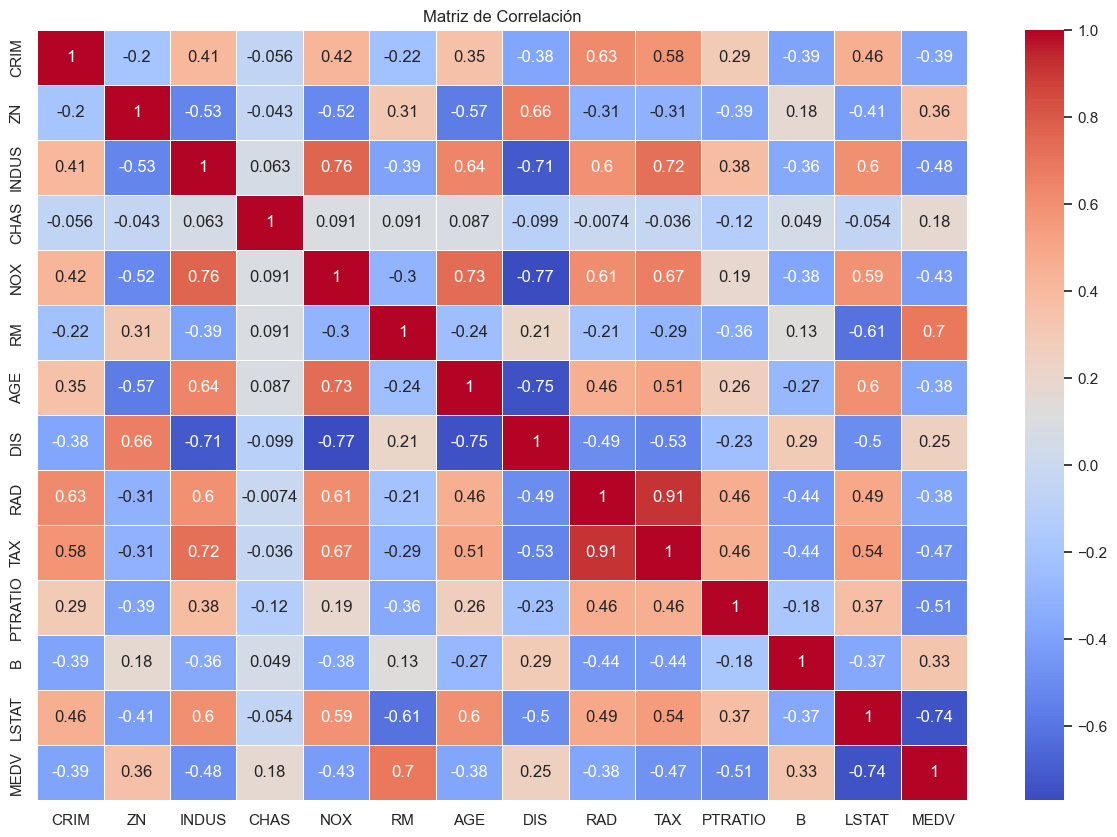

In [8]:
# Matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show() # ANALIZAR LAS CORRELACIONES SOBRE UN 0.7 

ANÁLISIS: 
La matriz de correlación señala las relaciones entre las variables de estudio. En la matriz se puede ver que: 

1.- Las variables INDUS y NOX tienen una correlación de 0,76 que es considerada como alta. Esto se interpreta como que a una mayor proporción de superficie de negocio no minorista se asocia con una mayor concentración de óxidos de Nitrógeno. 

2.- Las variables TAX y RAD tienen una correlación de 0,91 que se considera como una alta correlación. Esto se interpreta como que a un mayor indice de accesibilidad a autopistas se le asocia un impuesto de bienes inmuebles más elevado. 

3.- Las variables MEDV y RM tienen una correlación de 0,70, la que es considerada como alta. Esto se interpreta como que a una mayor cantidad promedio de habitaciones por vivienda se le asocia un mayor valor medio de las viviendas.  

4.- Las variables DIS y NOX tienen una correlación negativa de -0,77 que se considera como elevada. Esto se interpreta como que una mayor distancia a centros de empleo se asocia con una menor concentración de óxidos de Nitrógeno. 

5.- Las variables LSTAT y MEDV tienen una correlación negativa de -0,74 que es considerada como alta. Esto se interpreta como que a un mayor porcentaje de población de bajo estatus se le asocia un menor valor medio de las viviendas. 

6.- Las variables AGE y DIS tienen una correlación negativa de -0,75, la cual es considerada como elevada. Con lo cúal se interpreta que la mayor antigüedad de las viviendas se asocia a menores distancias a centros de empleo. 

7.- Las variables INDUS y DIS tienen una correlación negativa de -0,71 que es considerada como elevada. Esto se interpreta como que a mayor proporción de superficie de negocio no minorista se asocia con menores distancias a centros de empleo. 


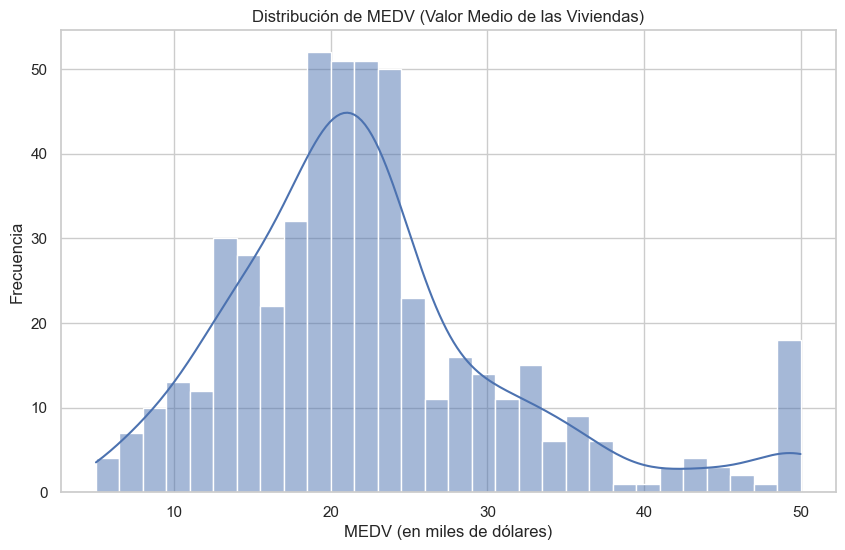

In [28]:
# Histograma de MEDV
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribución de MEDV (Valor Medio de las Viviendas)')
plt.xlabel('MEDV (en miles de dólares)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_17108\686101245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_medv.values, y=corr_with_medv.index, palette='coolwarm')


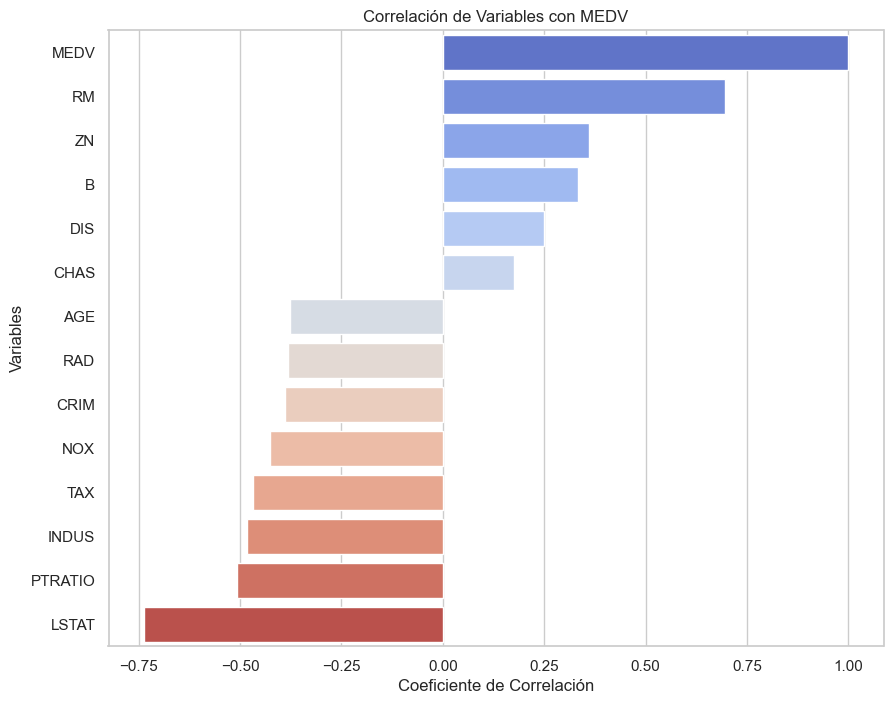

In [35]:
# Calcular las correlaciones de todas las variables con MEDV
corr_with_medv = data.corr()['MEDV'].sort_values(ascending=False)

# Visualizar las correlaciones con un gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_medv.values, y=corr_with_medv.index, palette='coolwarm')
plt.title('Correlación de Variables con MEDV')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show() 

In [34]:
# Calculando estadísticas adicionales para MEDV
mean_medv = data['MEDV'].mean()
median_medv = data['MEDV'].median()
mode_medv = statistics.mode(data['MEDV'])

# Sesgo y curtosis de MEDV
skewness_medv = stats.skew(data['MEDV'])
kurtosis_medv = stats.kurtosis(data['MEDV'])

mean_medv, median_medv, mode_medv, skewness_medv, kurtosis_medv

(22.532806324110677, 21.2, 50.0, 1.104810822864635, 1.4686287722747462)

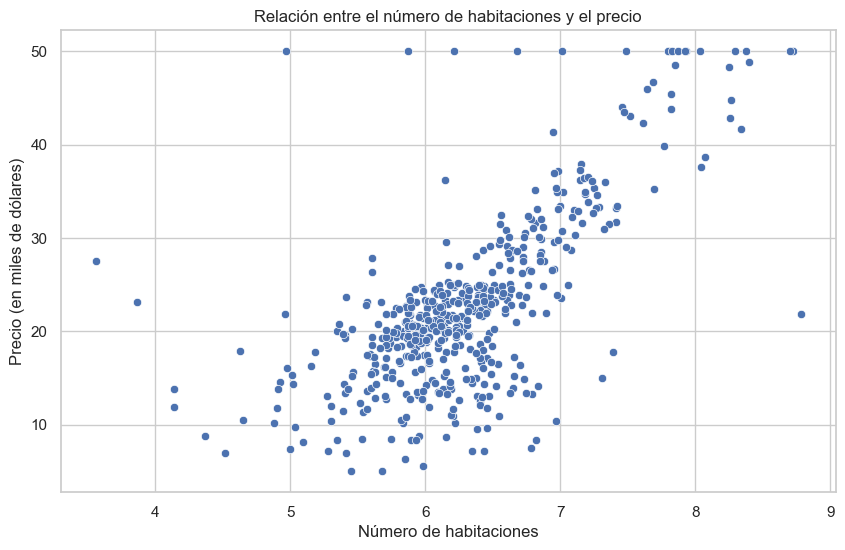

In [50]:
# Relación entre el precio y el número de habitaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Relación entre el número de habitaciones y el precio')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio (en miles de dólares)')
plt.show()

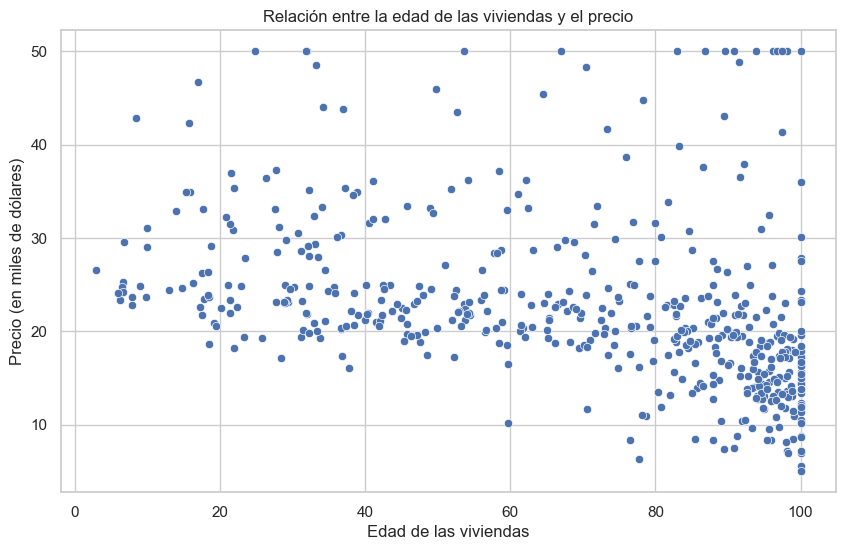

In [51]:
# Relación entre el precio y la edad de las viviendas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='MEDV', data=data)
plt.title('Relación entre la edad de las viviendas y el precio')
plt.xlabel('Edad de las viviendas')
plt.ylabel('Precio (en miles de dólares)')
plt.show() 

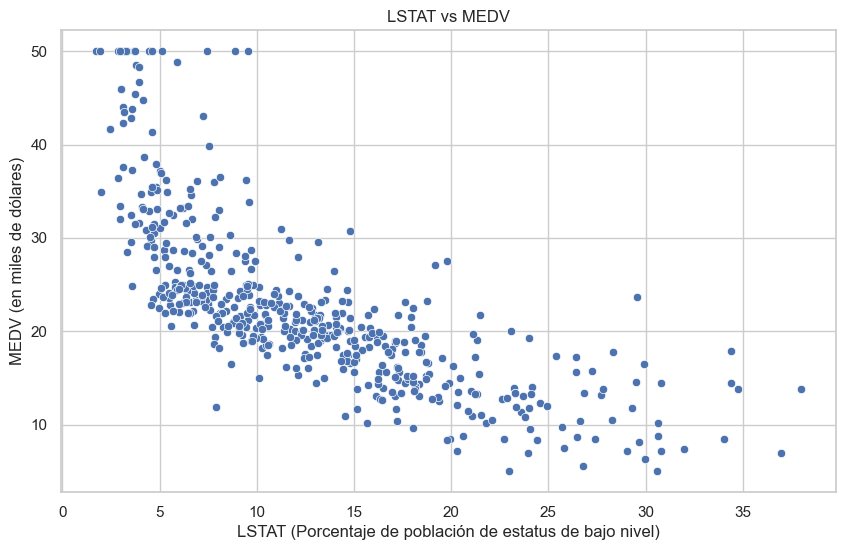

In [52]:
# Gráfico de dispersión de LSTAT vs MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=data)
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT (Porcentaje de población de estatus de bajo nivel)')
plt.ylabel('MEDV (en miles de dólares)')
plt.show()

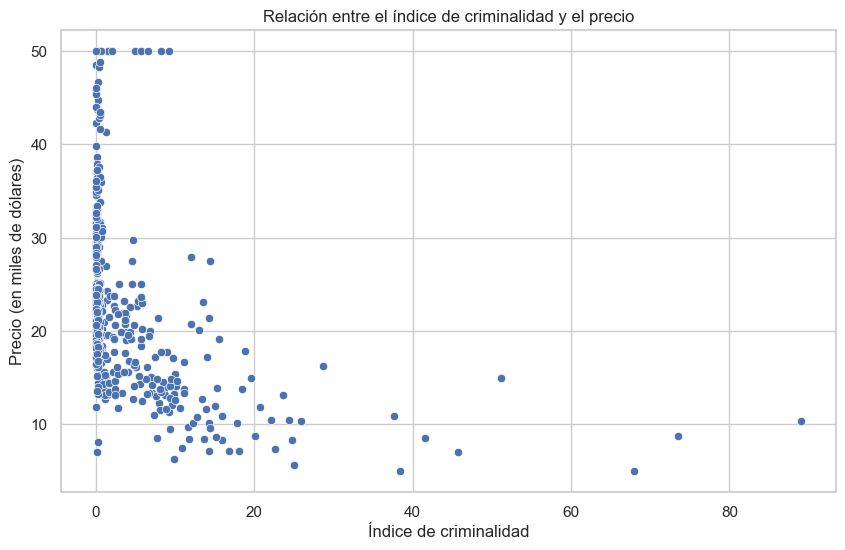

In [53]:
# Relación entre el precio y el índice de criminalidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRIM', y='MEDV', data=data)
plt.title('Relación entre el índice de criminalidad y el precio')
plt.xlabel('Índice de criminalidad')
plt.ylabel('Precio (en miles de dólares)')
plt.show() 